In [1]:
import time
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
!pip install -q kaggle

In [3]:
import os

In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:15<00:00, 43.2MB/s]
100% 612M/612M [00:15<00:00, 40.2MB/s]


In [5]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 6.6 MB/s eta 0:00:00


In [6]:
import patoolib

In [7]:
patoolib.extract_archive("/content/gtsrb-german-traffic-sign.zip")

patool: Extracting /content/gtsrb-german-traffic-sign.zip ...
patool: running /usr/bin/7z x -o./Unpack_hihgl91j -- /content/gtsrb-german-traffic-sign.zip
patool: ... /content/gtsrb-german-traffic-sign.zip extracted to `gtsrb-german-traffic-sign' (multiple files in root).


'gtsrb-german-traffic-sign'

In [8]:
start = time.time()
image_data = []
image_labels = []
total_classes = 43
height = 32
width = 32
channels = 3
input_path = '/content/gtsrb-german-traffic-sign/'

for i in range(total_classes):
    path = input_path + 'Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
end = time.time()
print("It has taken", round(end-start,5), "seconds")

/content/gtsrb-german-traffic-sign/Train/0
/content/gtsrb-german-traffic-sign/Train/1
/content/gtsrb-german-traffic-sign/Train/2
/content/gtsrb-german-traffic-sign/Train/3
/content/gtsrb-german-traffic-sign/Train/4
/content/gtsrb-german-traffic-sign/Train/5
/content/gtsrb-german-traffic-sign/Train/6
/content/gtsrb-german-traffic-sign/Train/7
/content/gtsrb-german-traffic-sign/Train/8
/content/gtsrb-german-traffic-sign/Train/9
/content/gtsrb-german-traffic-sign/Train/10
/content/gtsrb-german-traffic-sign/Train/11
/content/gtsrb-german-traffic-sign/Train/12
/content/gtsrb-german-traffic-sign/Train/13
/content/gtsrb-german-traffic-sign/Train/14
/content/gtsrb-german-traffic-sign/Train/15
/content/gtsrb-german-traffic-sign/Train/16
/content/gtsrb-german-traffic-sign/Train/17
/content/gtsrb-german-traffic-sign/Train/18
/content/gtsrb-german-traffic-sign/Train/19
/content/gtsrb-german-traffic-sign/Train/20
/content/gtsrb-german-traffic-sign/Train/21
/content/gtsrb-german-traffic-sign/Train/2

In [9]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [10]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)


X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [32]:
X_train=X_train.astype('float32')
X_valid=X_valid.astype('float32')

In [11]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [12]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='tanh', input_shape=(height,width,channels)),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    tf.keras.layers.Dense(43),
    tf.keras.layers.Activation(tf.nn.softmax)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [15]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epochs = 12
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_valid, y_valid))

Epoch 1/12
981/981 [==============================] - 25s 7ms/step - loss: 0.9804 - accuracy: 0.7423 - val_loss: 0.2948 - val_accuracy: 0.9271
Epoch 2/12
981/981 [==============================] - 8s 8ms/step - loss: 0.2102 - accuracy: 0.9480 - val_loss: 0.1410 - val_accuracy: 0.9662
Epoch 3/12
981/981 [==============================] - 5s 5ms/step - loss: 0.1144 - accuracy: 0.9744 - val_loss: 0.1128 - val_accuracy: 0.9728
Epoch 4/12
981/981 [==============================] - 7s 7ms/step - loss: 0.0742 - accuracy: 0.9829 - val_loss: 0.1045 - val_accuracy: 0.9731
Epoch 5/12
981/981 [==============================] - 5s 5ms/step - loss: 0.0503 - accuracy: 0.9883 - val_loss: 0.0732 - val_accuracy: 0.9813
Epoch 6/12
981/981 [==============================] - 6s 6ms/step - loss: 0.0329 - accuracy: 0.9926 - val_loss: 0.0668 - val_accuracy: 0.9823
Epoch 7/12
981/981 [==============================] - 6s 6ms/step - loss: 0.0277 - accuracy: 0.9937 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch

In [ ]:
model.save("lnet.h5")

In [17]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
start = time.time()
test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [18]:
!pip install cleverhans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 20.4 MB/s eta 0:00:00


In [19]:
from cleverhans.tf2.attacks import carlini_wagner_l2

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

In [ ]:
y_valid[0].shape

(43,)

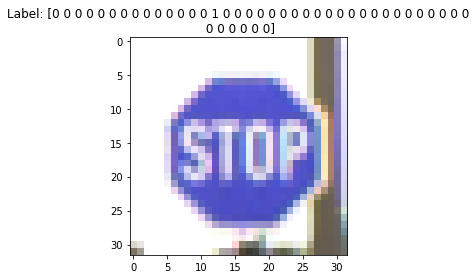

In [ ]:
random_index = np.random.randint(X_valid.shape[0])

original_image = X_valid[random_index]
original_image = tf.convert_to_tensor(original_image) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor

original_label = y_valid[random_index]
original_label = np.reshape(original_label, (1,43)).astype('int64') # Give label proper shape and type for cleverhans

#Show the image
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(original_image, (32,32,3)))
plt.title("Label: {}".format(original_label[0]))

plt.show()

In [ ]:
from cleverhans.tf2.attacks import fast_gradient_method
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

def attack(image):
  epsilon = 0.1
  adv_example_untargeted_label = fast_gradient_method(logits_model, image, 0.1 , np.inf, targeted=False)
  adv_example_untargeted_label_pred = model.predict((adv_example_untargeted_label))
  return adv_example_untargeted_label[0]

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
train_x_px = []
val_x_px = []

for i in range(X_train.shape[0]):
  temp = attack(X_train[None,i,:,:,:])
  train_x_px.append(temp)

for i in range(X_valid.shape[0]):
  temp = attack(X_valid[None,i,:,:,:])
  val_x_px.append(temp)

train_x_px = np.array(train_x_px)
val_x_px = np.array(val_x_px)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step


In [ ]:
train_x_px=np.concatenate((X_train,train_x_px),axis=0)
val_x_px=np.concatenate((X_valid,val_x_px),axis=0)

In [ ]:
y_train1=np.concatenate((y_train,y_train),axis=0)
y_valid1=np.concatenate((y_valid,y_valid),axis=0)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='tanh', input_shape=(height,width,channels)),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    tf.keras.layers.Dense(43),
    tf.keras.layers.Activation(tf.nn.softmax)
])

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', mode='auto')

model1.fit(train_x_px,y_train1,
            epochs=20,
            batch_size=25,
            validation_data=(val_x_px,y_valid1))

Epoch 1/20
2510/2510 [==============================] - 12s 5ms/step - loss: 0.2262 - accuracy: 0.9314 - val_loss: 0.2631 - val_accuracy: 0.9365
Epoch 2/20
2510/2510 [==============================] - 10s 4ms/step - loss: 0.1156 - accuracy: 0.9643 - val_loss: 0.2356 - val_accuracy: 0.9411
Epoch 3/20
2510/2510 [==============================] - 10s 4ms/step - loss: 0.0912 - accuracy: 0.9709 - val_loss: 0.2388 - val_accuracy: 0.9419
Epoch 4/20
2510/2510 [==============================] - 10s 4ms/step - loss: 0.0737 - accuracy: 0.9769 - val_loss: 0.2265 - val_accuracy: 0.9478
Epoch 5/20
2510/2510 [==============================] - 11s 4ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.2078 - val_accuracy: 0.9532
Epoch 6/20
2510/2510 [==============================] - 10s 4ms/step - loss: 0.0564 - accuracy: 0.9820 - val_loss: 0.2331 - val_accuracy: 0.9491
Epoch 7/20
2510/2510 [==============================] - 11s 5ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.2259 - val_ac

In [ ]:
#evaluating the model
score = model1.evaluate(val_x_px,y_valid1, verbose = 0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  0.23607736825942993
test accuracy:  0.9561336636543274


In [ ]:
model1.save("at.h5")

In [ ]:
#evaluating the model
score = model1.evaluate(X_valid,y_valid, verbose = 0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  0.1344689577817917
test accuracy:  0.966335117816925


In [ ]:
from cleverhans.tf2.attacks import carlini_wagner_l2
from cleverhans.tf2.attacks.carlini_wagner_l2 import carlini_wagner_l2

In [ ]:

from tqdm import tqdm

In [ ]:
X_train=X_train.astype('float32')
X_valid=X_valid.astype('float32')

In [ ]:
y_train.shape

In [24]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
!pip inatall cleverhans

In [25]:
from cleverhans.tf2.attacks import carlini_wagner_l2
from cleverhans.tf2.attacks.carlini_wagner_l2 import carlini_wagner_l2

In [26]:
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

In [94]:
x_test_per=carlini_wagner_l2(logits_model,X_valid[None,1,:,:,:],targeted=False)

In [34]:
import matplotlib.pyplot as plt

In [101]:
image = model.predict(X_valid[None,1,:,:,:])

1/1 [==============================] - 0s 21ms/step


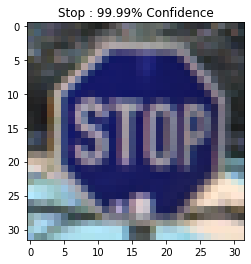

In [103]:
#before attack
plt.figure()
plt.imshow(X_valid[1])
preds=np.argmax(image, axis=-1)
plt.title('{} : {:.2f}% Confidence'.format(classes[preds[0]], image[0][preds[0]]*100))
plt.show()

In [95]:
image_probs = model.predict(x_test_per)

1/1 [==============================] - 0s 21ms/step


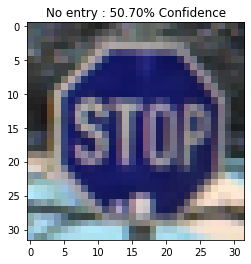

In [96]:
#after c and w attack
plt.figure()
plt.imshow(x_test_per.reshape(32, 32, 3))
preds1=np.argmax(image_probs, axis=-1)
plt.title('{} : {:.2f}% Confidence'.format(classes[preds1[0]], image_probs[0][preds1[0]]*100))
plt.show()

In [42]:
from tensorflow.keras.initializers import orthogonal
import keras.models as models
from keras.optimizers import SGD, Adam

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras.layers as layers

In [57]:
def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

In [83]:
input_shape=(32,32)

In [85]:
#proposed model
def m1(input_shape):
    inputs = layers.Input(shape=input_shape)
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    conv7 = Conv2DLayer(conv6, 1024, 3, strides=2, padding='same', block_id=60)
    deconv0 = Transpose_Conv2D(conv7, 1024, 3, strides=2, padding='same', block_id=7)
    skip0 = layers.concatenate([deconv0, conv6], name='skip0')
    conv77 = Conv2DLayer(skip0, 512, 3, strides=1, padding='same', block_id=80)
    deconv1 = Transpose_Conv2D(conv77, 256, 3, strides=2, padding='same', block_id=90)
    
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',kernel_initializer=orthogonal(), name='final_conv')(skip3)
    c3=Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh')(conv10)
    c4=AveragePooling2D(pool_size=(2,2), strides=2)(c3)
    c10=keras.layers.Flatten()(c4)
    c11=keras.layers.Dense(units=84, activation='tanh')(c10)
    c12=keras.layers.Dense(units=43, activation='softmax')(c11)
    return models.Model(inputs=inputs, outputs=c12)

In [86]:
model2 = m1((*input_shape, 3))
model_opt = Adam(lr=0.002)
model1.compile(optimizer=model_opt, loss='mse', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [104]:
epochs = 25
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_valid, y_valid))

Epoch 1/25
981/981 [==============================] - 65s 66ms/step - loss: 3.3585e-04 - accuracy: 0.9915 - val_loss: 6.8240e-04 - val_accuracy: 0.9809
Epoch 2/25
981/981 [==============================] - 65s 67ms/step - loss: 3.3016e-04 - accuracy: 0.9916 - val_loss: 7.7512e-04 - val_accuracy: 0.9782
Epoch 3/25
981/981 [==============================] - 65s 66ms/step - loss: 3.1269e-04 - accuracy: 0.9917 - val_loss: 6.5072e-04 - val_accuracy: 0.9813
Epoch 4/25
981/981 [==============================] - 65s 66ms/step - loss: 2.8275e-04 - accuracy: 0.9924 - val_loss: 5.7244e-04 - val_accuracy: 0.9834
Epoch 5/25
981/981 [==============================] - 65s 66ms/step - loss: 3.1572e-04 - accuracy: 0.9919 - val_loss: 6.6176e-04 - val_accuracy: 0.9820
Epoch 6/25
981/981 [==============================] - 65s 66ms/step - loss: 2.9882e-04 - accuracy: 0.9918 - val_loss: 5.5084e-04 - val_accuracy: 0.9846
Epoch 7/25
981/981 [==============================] - 65s 66ms/step - loss: 2.7734e-04 -

In [ ]:
model2.save("pm.h5")

In [106]:
from tqdm import tqdm

In [107]:
x_test_pred1=[]
for i in tqdm(range(0,50)):
    x_test_per=carlini_wagner_l2(logits_model,X_train[None,i,:,:,:],targeted=False)
    x_test_pred1.append(x_test_per)

100%|██████████| 50/50 [21:40<00:00, 26.01s/it]


In [108]:
y_test_pred1=[]
for i in tqdm(range(0,50)):
  y_test_pred1.append(y_train[i])

100%|██████████| 50/50 [00:00<00:00, 248183.67it/s]


In [110]:
#proposed model aganest c and w
x_test_pred1=np.reshape(x_test_pred1, (50,32, 32, 3))
y_test_pred1=np.reshape(y_test_pred1, (50,43))
score = model1.evaluate(x_test_pred1,y_test_pred1, verbose = 0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  0.00011828081915155053
test accuracy:  1.0


In [98]:
image_probs = model1.predict(x_test_per)

1/1 [==============================] - 0s 33ms/step


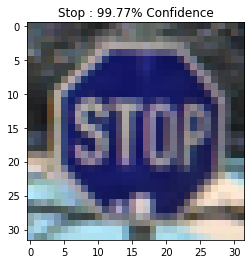

In [99]:
#proposed model increase Confidence of model from 50 to 99 and predected correctly
plt.figure()
plt.imshow(x_test_per.reshape(32, 32, 3))
preds1=np.argmax(image_probs, axis=-1)
plt.title('{} : {:.2f}% Confidence'.format(classes[preds1[0]], image_probs[0][preds1[0]]*100))
plt.show()